# Training

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, f1_score, roc_curve, auc
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#import train feature table. Path must be changed before use
reference = pd.read_csv('C:/Users/Quynh Anh/Muskelultraschall/features_train.csv')
#remore Image_ID columns
reference.drop('Image_ID', axis='columns', inplace=True)
reference

#create training data
X_train = reference.iloc [:, 1:]
y_train = reference.iloc [:, 0]

#feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [6]:
#initiate model
model = linear_model.LogisticRegression(penalty='l2', class_weight= 'balanced', max_iter = 200)

In [7]:
#Hyperparameter Tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Run GridSearchCV 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Quynh Anh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Quynh Anh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Quynh Anh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Quynh Anh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Quynh Anh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Quynh Anh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: Convergen

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [9]:
#find out best parameter
final_param = grid_search.best_params_
final_score = grid_search.best_score_
print (f"Final parameter: {final_param}")
print (f"Final score: {final_score}")

Final parameter: {'C': 100, 'solver': 'saga'}
Final score: 0.8885017421602788


In [11]:
# Save best model
final_model = grid_search.best_estimator_
joblib.dump(final_model, 'Lo_Re_model.pkl')

['Lo_Re_model.pkl']

# Evaluation

In [12]:
#import test feature table. Path must be changed before use
reference = pd.read_csv('C:/Users/Quynh Anh/Muskelultraschall/features_test.csv')
#remore Image_ID columns
reference.drop('Image_ID', axis='columns', inplace=True)
reference

#create training data
X_test = reference.iloc [:, 1:]
y_test = reference.iloc [:, 0]

#feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [17]:
#create prediction
loaded_model = joblib.load('Lo_Re_model.pkl')
y_pred = loaded_model.predict(X_test)

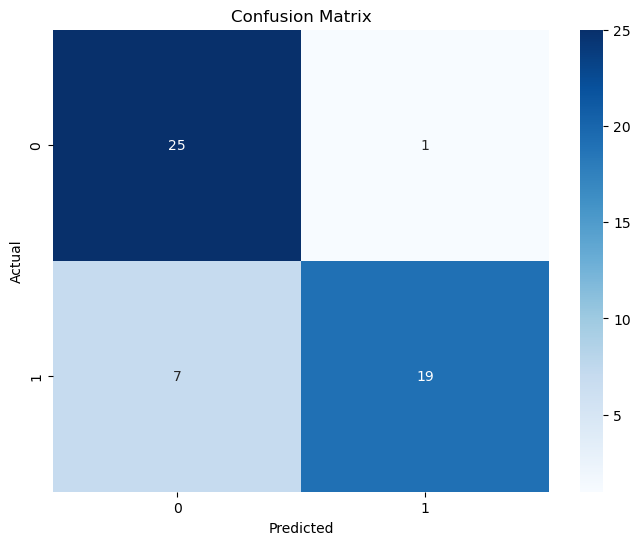

In [18]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score (y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8461538461538461
F1 Score: 0.8260869565217392


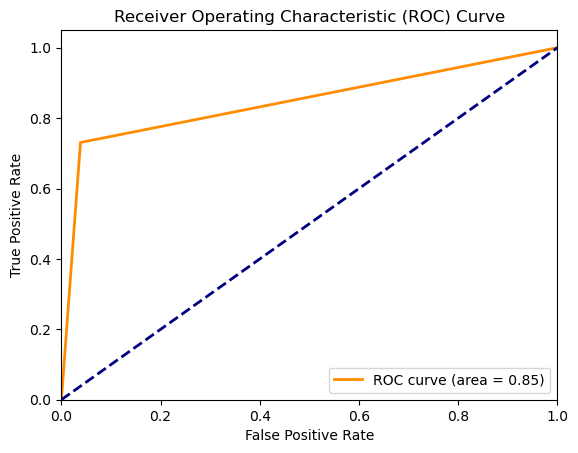

In [20]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Use the positive class probabilities
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()